In [1]:
from plotting_loading import *

/net/fs-desai01/srv/export/desai_lab/share/users/mjohnson/VTn/VTn_pipeline/Analysis/plotting_loading.py:71: RuntimeWarning: Mean of empty slice
  anc_s[cond][edge] = np.nanmean(td['s'])
/net/fs-desai01/srv/export/desai_lab/share/users/mjohnson/VTn/VTn_pipeline/Analysis/plotting_loading.py:82: RuntimeWarning: Mean of empty slice
  anc_s_clones[cond][edge] = np.nanmean(td['s'])


In [2]:
mat = []
dats = [vtn_modeling, vtn_modeling_shuf, vtn_modeling_sim]
names = ['Real Data', 'Shuffled Data', 'Simulated Data']
for d in range(3):
    dat = dats[d]
    for cond in conditions:
        df = dat[(pd.notnull(dat[cond+'_IM_Coeffs'])) & (dat.Type=='Experiment')].sort_values(cond+'_s_var', ascending=False)
        tmp = [names[d], cond]
        cols = ['Dataset', 'Cond']
        for model in ['IM', 'XM', 'FM']:
            tmp += [np.nanmean(df[cond+'_'+model+'_R2']), np.nansum(df[cond+'_'+model+'_R2']*df[cond+'_s_var'])/np.nansum(df[cond+'_s_var'])]
            total_points = 0
            for edge in set(df.Edge):
                td = vtn_s[(vtn_s.Edge==edge) & (vtn_s.Cond==cond) & (vtn_s.num_cbcs>=5) & (vtn_s['s_sub_g70_s'].notnull())]
                if len(td)>=20:
                    total_points += len(td)
            total_params = 0
            all_coeffs = []
            for j, row in df.iterrows():
                p, c = row[cond+'_'+model+'_Params'], row[cond+'_'+model+'_Coeffs']
                if pd.notnull(p) and str(p) != '':
                    params = p.split(';')
                    coeffs = [float(i) for i in str(c).split(';')]
                    total_params += len(params)
                    all_coeffs += [coeffs[i] for i in range(len(coeffs)) if params[i] not in ['Fitness_sub_70', 'dummy', 'Intercept']]
            #print(cond, model, total_points, total_params)
            tmp += [-2*np.sum(df[cond+'_'+model+'_LLF'])+total_params*np.log(total_points)]
            tmp += [len(all_coeffs), len([i for i in all_coeffs if i>0]), len([i for i in all_coeffs if i<0])]
            cols += [model+'_mean_R2', model+'_R2', model+'_BIC', model+'_n_coeffs', model+'_n_pos_coeffs', model+'_n_neg_coeffs']
        mat.append(tmp)
    
modeling_summary = pd.DataFrame(mat, columns=cols)
modeling_summary.to_csv('../../output/Modeling_summary.csv', index=False)
modeling_summary

,Dataset,Cond,IM_mean_R2,IM_R2,IM_BIC,IM_n_coeffs,IM_n_pos_coeffs,IM_n_neg_coeffs,XM_mean_R2,XM_R2,XM_BIC,XM_n_coeffs,XM_n_pos_coeffs,XM_n_neg_coeffs,FM_mean_R2,FM_R2,FM_BIC,FM_n_coeffs,FM_n_pos_coeffs,FM_n_neg_coeffs
0,Real Data,P1_YPD_30C,0.540995,0.620638,-16440.081689,291,77,214,0.176947,0.200474,-16354.458140,0,0,0,0.529631,0.600074,-17003.420718,140,42,98
1,Real Data,P3_SC_37C,0.411916,0.543799,-12006.780456,245,131,114,0.190643,0.191414,-12546.819328,0,0,0,0.438241,0.561426,-12823.227547,88,24,64
2,Real Data,P1_SC_37C,0.591672,0.633096,-10932.842282,241,109,132,0.104196,0.109254,-9748.259670,0,0,0,0.621225,0.699330,-10908.487783,199,101,98
3,Shuffled Data,P1_YPD_30C,0.119386,0.134640,-15752.223915,91,46,45,0.028312,0.017658,-15841.139446,0,0,0,0.137033,0.147742,-15828.278049,45,14,31
4,Shuffled Data,P3_SC_37C,0.152915,0.155200,-12073.160997,78,23,55,0.028449,0.024617,-12053.970824,0,0,0,0.147525,0.149639,-12089.487810,38,11,27
5,Shuffled Data,P1_SC_37C,0.101136,0.066217,-9894.733033,60,36,24,0.014012,0.004818,-9498.126029,0,0,0,0.148829,0.121080,-9584.258900,63,34,29
6,Simulated Data,P1_YPD_30C,0.125306,0.102111,-19867.619658,87,42,45,0.030016,0.034272,-19976.032274,0,0,0,0.127268,0.134368,-20007.844998,36,13,23
7,Simulated Data,P3_SC_37C,0.154581,0.163796,-15859.877767,81,46,35,0.021300,0.025779,-15821.404275,0,0,0,0.148447,0.175102,-15817.824717,46,23,23
8,Simulated Data,P1_SC_37C,0.117031,0.176143,-15736.253269,60,33,27,0.013237,0.012672,-15353.306924,0,0,0,0.147709,0.186003,-15365.525770,57,37,20


In [3]:
214/291, 131/245, 114/245, 109/241, 77/291

(0.7353951890034365,
 0.5346938775510204,
 0.46530612244897956,
 0.45228215767634855,
 0.2646048109965636)

In [4]:
edge_stats = vtn_modeling
for cond in conditions[:2]:
    td = edge_stats[(pd.notnull(edge_stats[cond+'_call'])) & (edge_stats.Type=='Experiment')]
    td2 = edge_stats[(pd.notnull(edge_stats[cond+'_IM_Coeffs'])) & (edge_stats.Type=='Experiment')]
    print('In', cond, 'out of', len(td), 'mutations,', len(td[td[cond+'_call']=='-']), 'have neg slopes and', len(td[td[cond+'_call']=='+']), 'have pos slopes.')
print('Overlap:', len(edge_stats[(pd.notnull(edge_stats['P1_YPD_30C_call'])) & (pd.notnull(edge_stats['P3_SC_37C_call'])) & (edge_stats.Type=='Experiment')]))
print('Note: one mutation in SC 37C has no gen 70 s values, so it has a slope but no modeling results (since we need gen 70 s for modeling) - this leads to the difference of having 74 vs. 73 mutations')

In P1_YPD_30C out of 77 mutations, 33 have neg slopes and 9 have pos slopes.
In P3_SC_37C out of 74 mutations, 17 have neg slopes and 13 have pos slopes.
Overlap: 70
Note: one mutation in SC 37C has no gen 70 s values, so it has a slope but no modeling results (since we need gen 70 s for modeling) - this leads to the difference of having 74 vs. 73 mutations


YPD
77 edges
Best BIC sum: FM counts: ['IM: 37', 'FM: 40', 'XM: 0']
IM 291 coeffs, mean -0.014979168760646842  std dev: 0.026769873146141338
FM 140 coeffs, mean -0.011658908801464477  std dev: 0.02726334424904404


/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


SC
73 edges
Best BIC sum: FM counts: ['IM: 24', 'FM: 49', 'XM: 0']
IM 245 coeffs, mean 0.004445560533487269  std dev: 0.048452453856016695
FM 88 coeffs, mean -0.01787426016630356  std dev: 0.05030513301787589


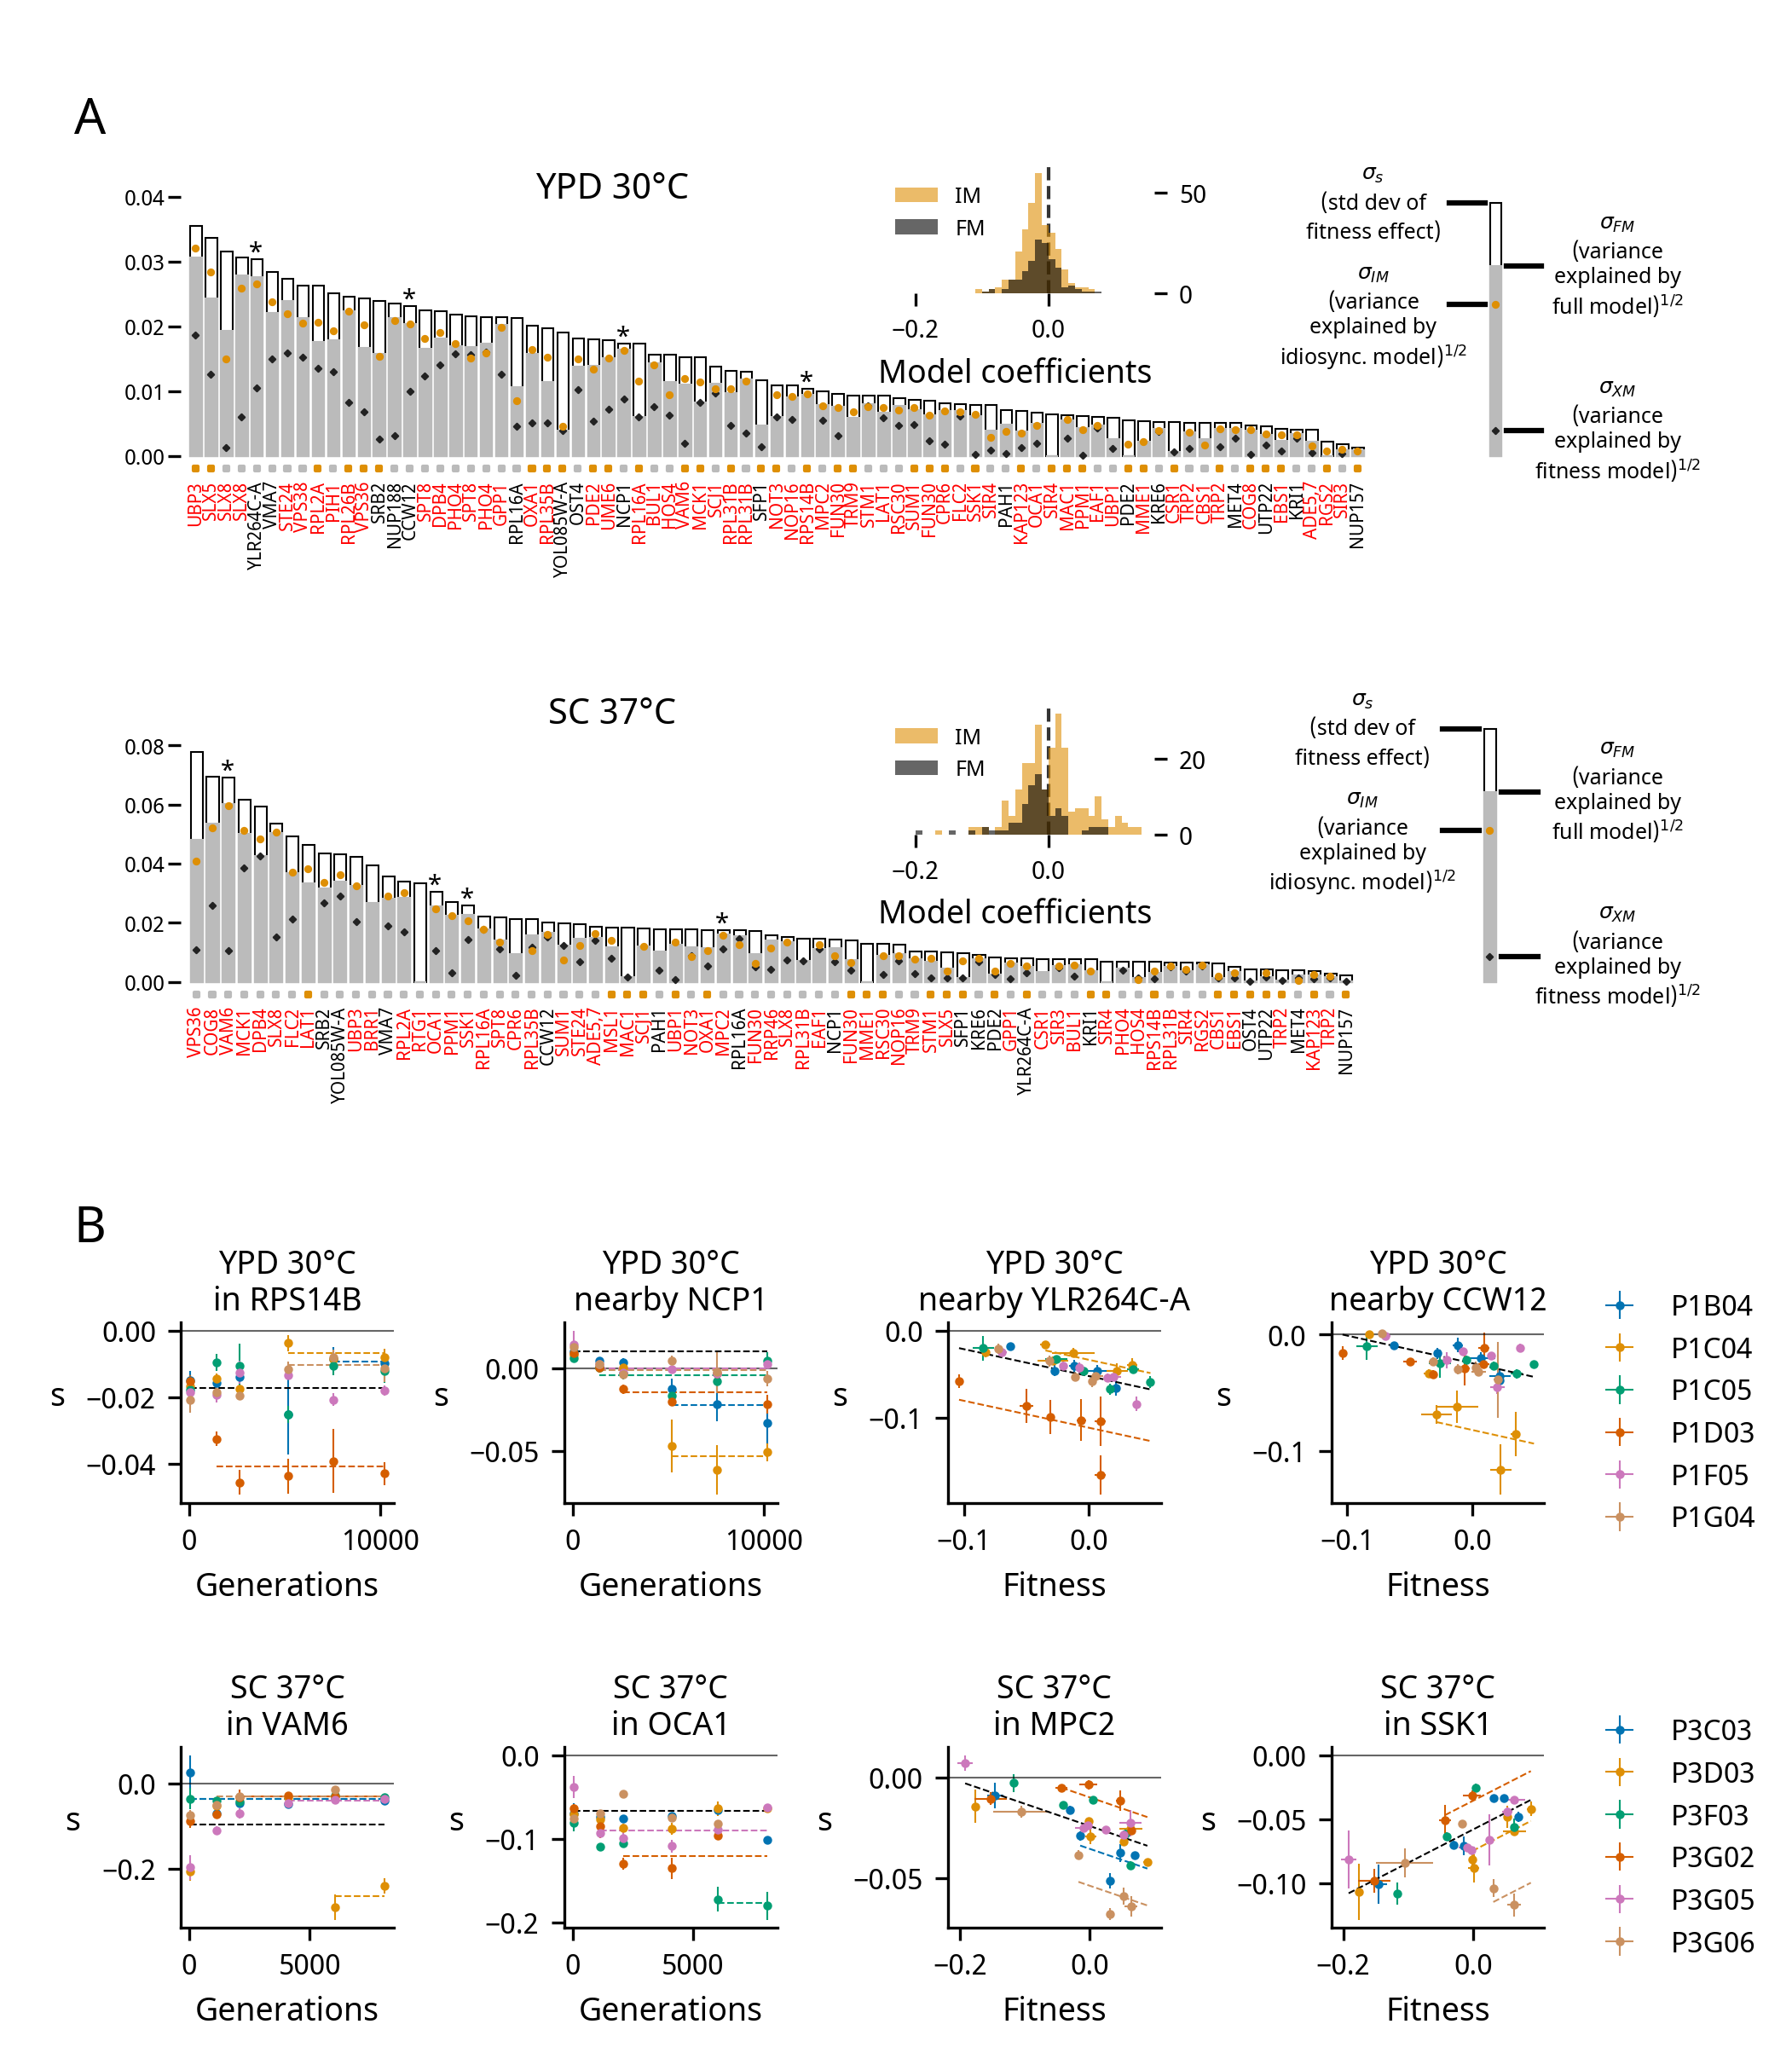

In [5]:
def gene_ticks(edges_in_order, sub, fs=5):
    gs = [e2g[e] for e in edges_in_order]
    pl.axes(sub)
    pl.xticks([i for i in range(len(gs))], [i.split(' ')[1] for i in gs], rotation='vertical', fontsize=fs)
    ticks = sub.get_xticklabels()
    cd = {'in': 'red', 'nearby': 'black'}
    jnk = [ticks[i].set_color(cd[gs[i].split(' ')[0]]) for i in range(len(gs))]


def determinant_plot(edge_stats, cond, top_sub, ex_edges, plot_example=True):

    df = edge_stats[(pd.notnull(edge_stats[cond+'_IM_Coeffs'])) & (edge_stats.Type=='Experiment')].sort_values(cond+'_s_var', ascending=False)
    print(len(df), 'edges')
    edges_in_order = list(df['Edge'])
    example_loc = len(df)+8
    xbars = np.array([i for i in range(len(df))] + [example_loc])

    top_sub.tick_params(axis='y', which='major', labelsize=6, pad=1)
    top_sub.tick_params(axis='x', which='major', labelsize=4.5, pad=-4)
    top_sub.set_xlim([-1, len(edges_in_order)+16])
    mv = np.max(np.sqrt(df[cond+'_s_var']))*1.1
    ex_dev, ex_full, ex_qtl, ex_x = mv, mv*0.75, mv*0.6, mv*0.1
    top_sub.bar(xbars, list(np.sqrt(df[cond+'_s_var'])) + [ex_dev], color='none', edgecolor='black', lw=0.5, width=0.75)
    top_sub.bar(xbars, list(np.sqrt(df[cond+'_FM_R2']*df[cond+'_s_var'])) + [ex_full], color='#BBBBBB', edgecolor='#BBBBBB', lw=0.5, width=0.75)
    xm_r2 = np.sqrt(df[cond+'_XM_R2']*df[cond+'_s_var'])
    xm_r2[xm_r2==0] = np.nan
    top_sub.scatter(xbars-0.03, list(xm_r2) + [ex_x], color='#222222', marker='x', zorder=3, s=1.5)
    im_r2 = np.sqrt(df[cond+'_IM_R2']*df[cond+'_s_var'])
    im_r2[im_r2==0] = np.nan
    top_sub.scatter(xbars-0.03, list(im_r2) + [ex_qtl], color=colors[1], marker='o', zorder=4, s=1.5)
    models = ['IM', 'FM', 'XM']
    model_colors = {'IM': colors[1], 'FM': '#BBBBBB', 'XM': '#222222'}
    best_bics = [sorted(models, key=lambda m: r[cond+'_'+m+'_BIC'])[0] for j, r in df.iterrows()]
    all_best_bics = sorted(models, key=lambda m: np.sum(df[cond+'_'+m+'_BIC']))[0] 
    print('Best BIC sum:', all_best_bics, 'counts:', [f'{m}: {best_bics.count(m)}' for m in models])
    top_sub.scatter(xbars[:-1]-0.03, [-mv*0.05]*len(xbars[:-1]), color=[model_colors[m] for m in best_bics], marker='s', zorder=3, s=1.5)
    
    gene_ticks(edges_in_order, top_sub)
    if plot_example:
        if cond != 'P3_YPD_30C': 
            top_sub.annotate('$\sigma_{XM}$\n(variance\nexplained by\nfitness model)$^{1/2}$', xy=(example_loc+8, ex_x), xycoords='data', fontsize=6, ha='center', va='center')
            top_sub.plot([example_loc+0.7, example_loc+3], [ex_x, ex_x], c='k')
            top_sub.annotate("$\sigma_{FM}$\n(variance\nexplained by\nfull model)$^{1/2}$", xy=(example_loc+8, ex_full), xycoords='data', fontsize=6, ha='center', va='center')
            top_sub.plot([example_loc+0.7, example_loc+3], [ex_full, ex_full], c='k')
            
        top_sub.annotate('$\sigma_s$\n(std dev of\nfitness effect)', xy=(example_loc-8, ex_dev), xycoords='data', fontsize=6, ha='center', va='center')
        top_sub.plot([example_loc-0.7, example_loc-3], [ex_dev, ex_dev], c='k')
        top_sub.annotate('\n$\sigma_{IM}$\n(variance\nexplained by\nidiosync. model)$^{1/2}$', xy=(example_loc-8, ex_qtl), xycoords='data', fontsize=6, ha='center', va='center')
        top_sub.plot([example_loc-0.7, example_loc-3], [ex_qtl, ex_qtl], c='k')

        
    sns.despine(left=True, bottom=True)
    top_sub.tick_params(axis="x", bottom=False)
    
    for edge in ex_edges:
        top_sub.annotate('*', (edges_in_order.index(edge)-0.1, list(np.sqrt(df[cond+'_s_var']))[edges_in_order.index(edge)]), 
                         fontsize=7, zorder=5, horizontalalignment="center")
        
def plot_hist(coeffs, sub, plot_FM=True):
    bin_lefts = [i*0.01-0.24 for i in range(39)]
    for model in coeffs:
        print(model, len(coeffs[model]), 'coeffs, mean', np.mean(coeffs[model]), ' std dev:', np.std(coeffs[model]))
    sub.hist(coeffs['IM'], bins=bin_lefts, zorder=1, alpha=0.6, color=colors[1], label='IM')
    if plot_FM:
        sub.hist(coeffs['FM'], bins=bin_lefts, zorder=1, alpha=0.6, color="k", label='FM')
    sub.axvline(0, zorder=0, color='#333', linestyle='dashed', lw=1)
    sub.set_xlabel('Model coefficients', fontsize=9)
    sub.legend(frameon=False, fontsize=6)
    sub.yaxis.tick_right()
    sub.tick_params(which='both', labelsize=7)
    sns.despine(ax=sub, bottom=True, left=True)

def plot_one_det(edge_stats, df, sub, cond, edge, model, axis_color, cbc_cutoff=5, title_cond=True, ms=2, xlabel=True, title_at_all=True, ls=7):
    td = df[(df['Edge']==edge) & (df['Cond']==cond) & (df['num_cbcs']>=cbc_cutoff)]
    sub.axhline(0, color='k', linewidth=0.5, alpha=0.6)
    xvar = {'FM': 'Fitness', 'IM': 'Gen', 'IM2': 'Gen'}[model]
    for pop in cond_pops[cond.split('_')[0]]:
        ttd = td[td.Pop==pop].sort_values('Gen')
        if xvar == 'Gen':
            gen_rec = [gen_fixer[g][cond.split('_')[0]] for g in ttd['Gen']]
            sub.errorbar(x=gen_rec, y=ttd['s'], yerr=ttd['stderr'], linestyle='', marker='.', markersize=ms, linewidth=0.5, color=color_map[pop], label=pop)
        else:
            sub.errorbar(x=ttd[xvar], y=ttd['s'], xerr=ttd['Fitness_std'], yerr=ttd['stderr'], linestyle='', marker='.', markersize=ms, linewidth=0.5, color=color_map[pop], label=pop)
    if xlabel: 
        sub.set_xlabel({'Gen': 'Generations', 'Fitness': 'Fitness'}[xvar], fontsize=ls)
    gene = edge_stats[edge_stats.Edge==edge].iloc[0]['Gene_Use']
    if title_cond:
        sub.set_title(cond_to_title[cond] + '\n' + gene, fontsize=ls, y=0.95)
    elif title_at_all:
        sub.set_title(gene, fontsize=ls, y=0.95)
    
    #sub.set_ylim([-0.15, 0.1])
    sub.tick_params(which='both', labelsize=6, colors=axis_color)
    sub.spines['bottom'].set_color(axis_color)
    sub.spines['left'].set_color(axis_color)
    #fit lines
    fit = edge_stats[edge_stats.Edge==edge].iloc[0]
    if pd.notnull(fit[cond+'_'+model+'_Params']):
        params = fit[cond+'_'+model+'_Params'].split(';')
        cs = fit[cond+'_'+model+'_Coeffs'].split(';')
        coeffs = {params[i]: float(cs[i]) for i in range(len(params))}
        if model == 'IM': 
            coeffs['Fitness_sub_70'] = 0
            coeffs['Intercept'] = td['g70_s'].iloc[0]
        elif model == 'FM':
            coeffs['Intercept'] = td['g70_s'].iloc[0]-g70_fits[cond]*coeffs['Fitness_sub_70']
        if xvar == 'Gen':
            x_rec = [gen_fixer[g][cond.split('_')[0]] for g in td['Gen']]
        else:
            x_rec = td[xvar]
        xlims = [np.min(x_rec), np.max(x_rec)]
        sub.plot(xlims, [i*coeffs['Fitness_sub_70']+coeffs['Intercept'] for i in xlims], c='k', linestyle='dashed', lw=0.5)
        for coef in [c for c in coeffs if c not in ['Fitness_sub_70', 'Intercept', 'dummy']]:
            if xvar == 'Gen':
                xlims[0] = np.min([gen_fixer[g][cond.split('_')[0]] for g in td[(td['Pop']==coef.split('_')[1]) & (td['Gen']>=int(coef.split('_')[-1]))][xvar]])
            else:
                xlims[0] = np.min(td[(td['Pop']==coef.split('_')[1]) & (td['Gen']>=int(coef.split('_')[-1]))][xvar])
            sub.plot(xlims, [i*coeffs['Fitness_sub_70']+coeffs['Intercept']+coeffs[coef] for i in xlims], c=color_map[coef.split('_')[1]], linestyle='dashed', lw=0.5)

            
def get_coeffs(edge_stats, cond):
    df = edge_stats[(pd.notnull(edge_stats[cond+'_IM_Coeffs'])) & (edge_stats.Type=='Experiment')].sort_values(cond+'_s_var', ascending=False)
    edges_in_order = list(df['Edge'])
    coeffs = {'IM': dict(), 'FM': dict()}
    coeffs_flat = {'IM': [], 'FM': []}
    for edge in edges_in_order:
        for model in ['IM', 'FM']:
            ps = str(edge_stats[edge_stats.Edge==edge].iloc[0][cond+'_'+model+'_Params']).split(';')
            cs = str(edge_stats[edge_stats.Edge==edge].iloc[0][cond+'_'+model+'_Coeffs']).split(';')
            coeffs[model][edge] = [float(cs[i]) for i in range(len(cs)) if ps[i] not in ['Fitness_sub_70', 'dummy']]
            coeffs_flat[model] += [float(cs[i]) for i in range(len(cs)) if ps[i] not in ['Fitness_sub_70', 'dummy']]
    return [coeffs, coeffs_flat]

###
### NOTE TO SELF: I think it would be better to have two histograms rather than the overlap
###

ypd_examples = [
    'GAGTGCTTCAAAGTT', # RPS14B
    'TAACCTCGCGCTGAG', # nearby NCP1
    'ATATTGAGTAAGTAC', # YLR-264C-A
    'AGTTTATAAAAAATT', # nearby CCW12
]
sc_examples = [
    'CATTTATGGCTATCT', # VAM6
    'AGAAGACGACGATGA', # OCA1
    'TTTTGCATTTAGGCG', # MPC2
    'CCAGGATGTACCGCC', # SSK1
]

coeffs_by_cond = {cond: get_coeffs(vtn_modeling, cond) for cond in conditions}

fig = pl.figure(figsize=(7.25, 9), dpi=300)
gs0 = gridspec.GridSpec(25, 20)
top_gs = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[:12,:])
subs = [pl.Subplot(fig, top_gs[i]) for i in range(2)] 
jnk = [fig.add_subplot(s) for s in subs]   
pl.subplots_adjust(hspace=0.55, wspace=0.45)
print('YPD')
determinant_plot(vtn_modeling, 'P1_YPD_30C', subs[0], ypd_examples)
isub1 = fig.add_axes([0.5, 0.835, 0.15, 0.055])
plot_hist(coeffs_by_cond['P1_YPD_30C'][1], isub1)
print('SC')
determinant_plot(vtn_modeling, 'P3_SC_37C', subs[1], sc_examples)
isub2 = fig.add_axes([0.5, 0.6, 0.15, 0.055])
plot_hist(coeffs_by_cond['P3_SC_37C'][1], isub2)
subs[0].set_title('YPD 30°C', fontsize=10, x=0.3, y=0.9)
subs[1].set_title('SC 37°C', fontsize=10, x=0.3, y=0.9)

tmp_gs = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs0[16:19,:19])
subs0 = [pl.Subplot(fig, tmp_gs[j]) for j in range(4)]
jnk = [fig.add_subplot(subs0[j]) for j in range(4)]
tmp_gs = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs0[22:,:19])
subs1 = [pl.Subplot(fig, tmp_gs[j]) for j in range(4)]
jnk = [fig.add_subplot(subs1[j]) for j in range(4)]
pl.subplots_adjust(hspace=0.8, wspace=0.8)

for i in range(4):
    plot_one_det(vtn_modeling, vtn_s, subs0[i], 'P1_YPD_30C', ypd_examples[i], ['IM','FM'][i//2], 'k', ms=3, ls=9)
    plot_one_det(vtn_modeling, vtn_s, subs1[i], 'P3_SC_37C', sc_examples[i], ['IM','FM'][i//2], 'k', ms=3, ls=9)

for j in range(4):
    subs0[j].set_ylabel('s', rotation='horizontal', fontsize=9, labelpad=8)
    subs1[j].set_ylabel('s', rotation='horizontal', fontsize=9, labelpad=8)
    subs0[j].tick_params(which='both', labelsize=8)
    subs1[j].tick_params(which='both', labelsize=8)
    sns.despine(ax=subs0[j])
    sns.despine(ax=subs1[j])
    if j == 3:
        subs0[j].legend(frameon=False, bbox_to_anchor=(1.1,1.3), ncol=1, fontsize=8)
        subs1[j].legend(frameon=False, bbox_to_anchor=(1.1,1.3), ncol=1, fontsize=8)

pl.annotate('A', fontsize=14, xy=(0.05, 0.935), xycoords="figure fraction", horizontalalignment="center")
pl.annotate('B', fontsize=14, xy=(0.05, (25-16)/25+0.035), xycoords="figure fraction", horizontalalignment="center")
#pl.annotate('C', fontsize=14, xy=(0.5, (25-14)/25+0.035), xycoords="figure fraction", horizontalalignment="center")

fig.savefig('../../Figures/Determinants.pdf', background='transparent', bbox_inches='tight', pad_inches=0.1)


In [6]:
40/77, 37/77, 49/73, 24/73

(0.5194805194805194,
 0.4805194805194805,
 0.6712328767123288,
 0.3287671232876712)

In [7]:
coeffs_by_cond = {cond: get_coeffs(vtn_modeling, cond) for cond in conditions}
coeffs_by_cond_shuf = {cond: get_coeffs(vtn_modeling_shuf, cond) for cond in conditions}
coeffs_by_cond_sim = {cond: get_coeffs(vtn_modeling_sim, cond) for cond in conditions}
for m in ['IM', 'FM']:
    for cond in conditions:
        cs = coeffs_by_cond[cond][1][m]
        shuf = coeffs_by_cond_shuf[cond][1][m]
        sim = coeffs_by_cond_sim[cond][1][m]
        #print(f'Number of {m} coeffs (real, shuffled data): n: {len(cs)}, {len(shuf)}; mean: {np.mean(cs)}, {np.mean(shuf)}; std: {np.std(cs)}, {np.std(shuf)}')
        print(f'In {cond_to_title[cond]}, we found {len(cs)}, {len(shuf)}, and {len(sim)} {m} coefficients in our empirical data, shuffled data, and simulated data, respectively.')
    

In YPD 30°C, we found 291, 91, and 87 IM coefficients in our empirical data, shuffled data, and simulated data, respectively.
In SC 37°C, we found 245, 78, and 81 IM coefficients in our empirical data, shuffled data, and simulated data, respectively.
In Evo. YPD 30°C, in SC 37°C, we found 241, 60, and 60 IM coefficients in our empirical data, shuffled data, and simulated data, respectively.
In YPD 30°C, we found 140, 45, and 36 FM coefficients in our empirical data, shuffled data, and simulated data, respectively.
In SC 37°C, we found 88, 38, and 46 FM coefficients in our empirical data, shuffled data, and simulated data, respectively.
In Evo. YPD 30°C, in SC 37°C, we found 199, 63, and 57 FM coefficients in our empirical data, shuffled data, and simulated data, respectively.


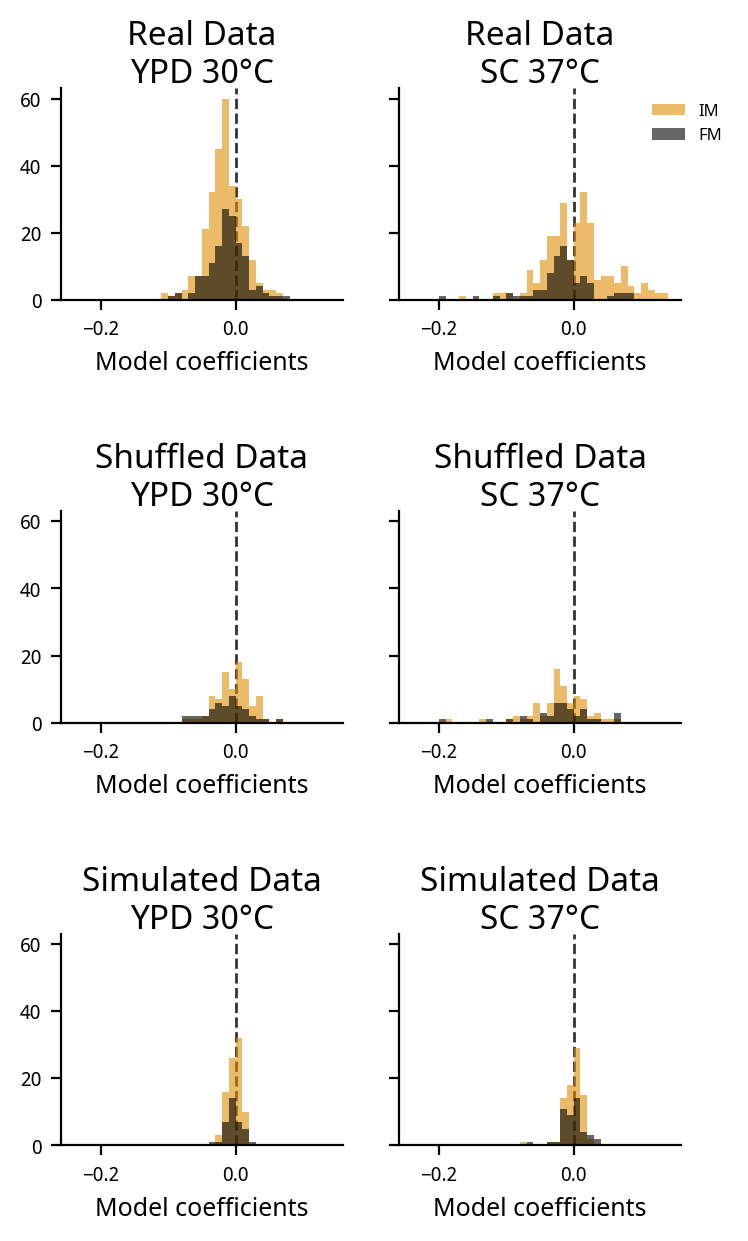

In [8]:
def simple_hist(coeffs, sub, t):
    bin_lefts = [i*0.01-0.24 for i in range(39)]
    #for model in coeffs:
    #    print(model, len(coeffs[model]), 'coeffs, mean', np.mean(coeffs[model]), ' std err:', np.std(coeffs[model])/len(coeffs[model]))
    sub.hist(coeffs['IM'], bins=bin_lefts, zorder=1, alpha=0.6, color=colors[1], label='IM')
    sub.hist(coeffs['FM'], bins=bin_lefts, zorder=1, alpha=0.6, color="k", label='FM')
    sub.axvline(0, zorder=0, color='#333', linestyle='dashed', lw=1)
    sub.set_xlabel('Model coefficients', fontsize=9)
    sub.tick_params(which='both', labelsize=7)
    sub.set_title(t, y=0.95)

fig, subs = pl.subplots(3, 2, figsize=(4, 7), dpi=200, sharey=True)
pl.subplots_adjust(hspace=1)
c = 0
data_names = ['Real Data', 'Shuffled Data', 'Simulated Data']
for cc in [coeffs_by_cond, coeffs_by_cond_shuf, coeffs_by_cond_sim]:
    simple_hist(cc['P1_YPD_30C'][1], subs[c][0], data_names[c] + '\n' + cond_to_title[conditions[0]])
    simple_hist(cc['P3_SC_37C'][1], subs[c][1], data_names[c] + '\n' + cond_to_title[conditions[1]])
    c += 1
subs[0][1].legend(frameon=False, fontsize=6, bbox_to_anchor=(1.2,1))
sns.despine()
fig.savefig('../../Figures/supp_figs/Coefficient_distribs.pdf', background='transparent', bbox_inches='tight', pad_inches=0.1)


70 edges
Best BIC sum: FM counts: ['IM: 35', 'FM: 35', 'XM: 0']
IM 241 coeffs, mean -0.007906568806828596  std dev: 0.056389434373899094
FM 199 coeffs, mean -0.01156209354458817  std dev: 0.06435858835033176


/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


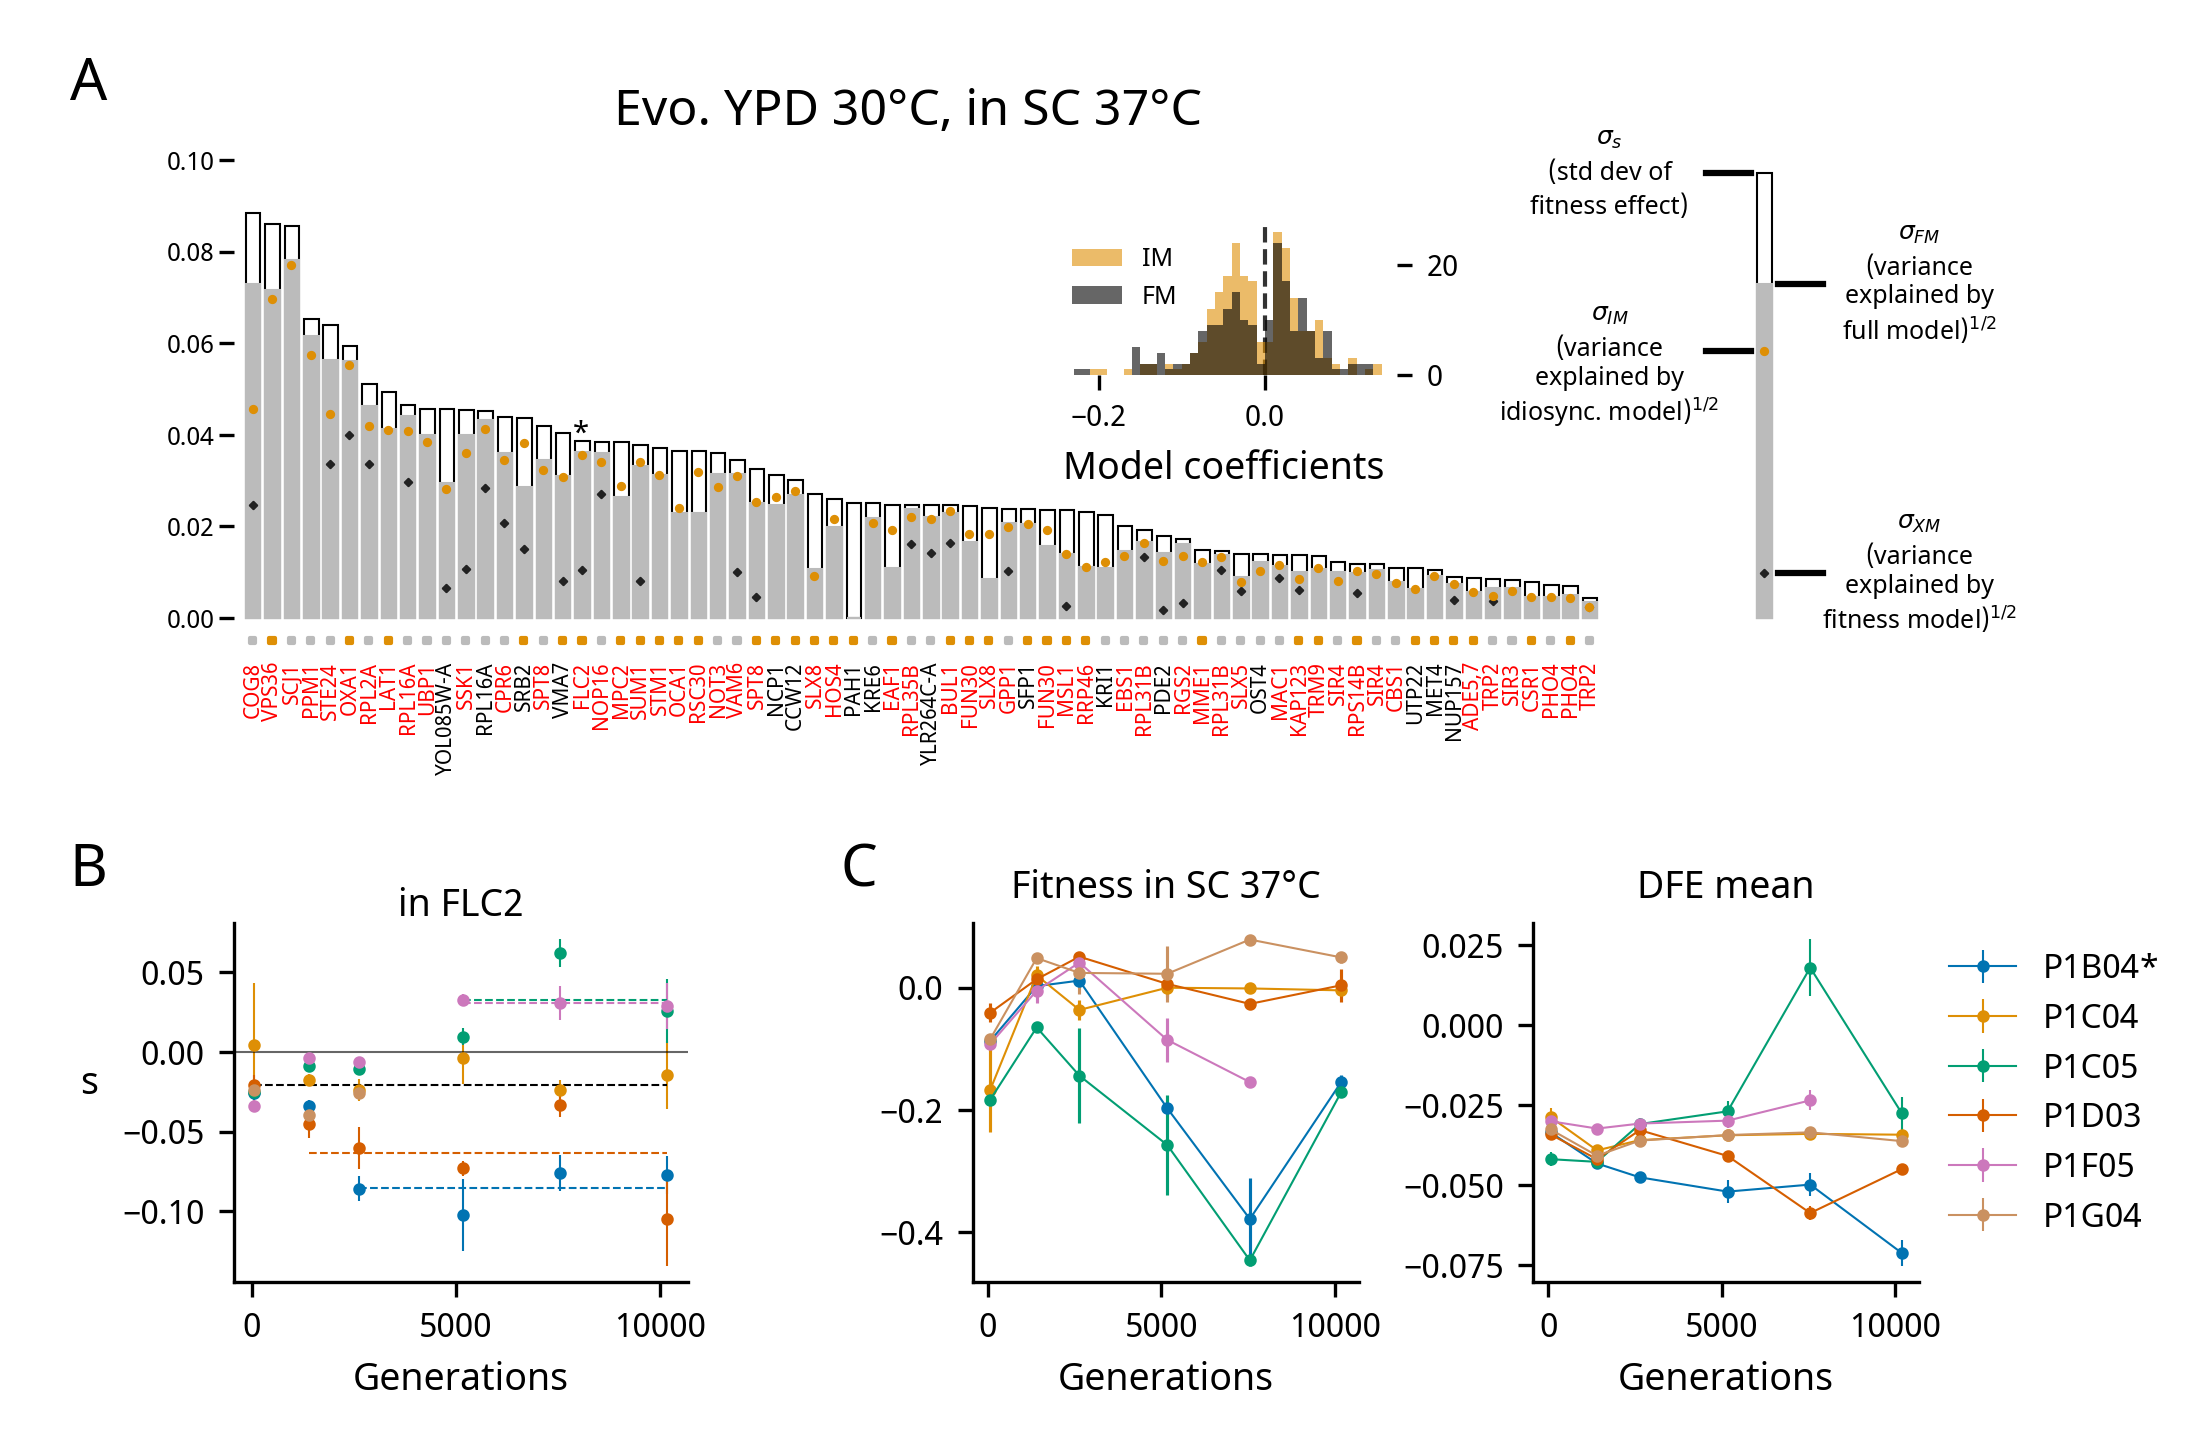

In [9]:
p1_sc_examples = [
    #'CTAAGCAGTCTTCTC', # in_LAT1_
    'TGATCATCACGGGAC', # in_FLC2_
    #'TTTAACTCACCGTAA', # nearby_SFP1_
]

fig = pl.figure(figsize=(7.25, 5), dpi=300)
gs0 = gridspec.GridSpec(15, 14)
top_gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[:7,:])
sub = pl.Subplot(fig, top_gs[0])
fig.add_subplot(sub)  

determinant_plot(vtn_modeling, 'P1_SC_37C', sub, p1_sc_examples)
sub.set_title(cond_to_title['P1_SC_37C'], fontsize=12, x=0.4, y=1)
isub1 = fig.add_axes([0.5, 0.73, 0.16, 0.1])
plot_hist(coeffs_by_cond['P1_SC_37C'][1], isub1)

dfe_gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[10:,6:])
dfe_subs = [pl.Subplot(fig, dfe_gs[0]), pl.Subplot(fig, dfe_gs[1])]
jnk = [fig.add_subplot(dfe_subs[i]) for i in range(2)]  
cond = 'P1_SC_37C'
td = vtn_dfe[vtn_dfe.Cond==cond]
for pop in cond_pops[cond.split('_')[0]]:
    ttd = td[td.Pop==pop].sort_values('Gen')
    gen_rec = [gen_fixer[g][cond.split('_')[0]] for g in ttd['Gen']]
    if sci_stats.linregress(gen_rec, ttd['DFE_mean'])[3]<0.05:
        lab = pop+'*'
    else:
        lab = pop
    #if len(ttd[ttd['Fitness_std']==0]) > 0:
    #    print('Missing errors for', cond, pop, list(ttd[ttd['Fitness_std']==0]['Gen']))
    dfe_subs[0].errorbar(x=gen_rec, y=ttd['Fitness'], yerr=ttd['Fitness_std'], linestyle='-', marker='.', markersize=4, elinewidth=0.75, linewidth=0.5, color=color_map[pop], label=lab)
    dfe_subs[1].errorbar(x=gen_rec, y=ttd['DFE_mean'], yerr=ttd['DFE_mean_std'], linestyle='-', marker='.', markersize=4, linewidth=0.5, color=color_map[pop], label=lab)
dfe_subs[1].set_title('DFE mean', fontsize=9)
dfe_subs[0].set_title('Fitness in SC 37°C', fontsize=9)
dfe_subs[1].legend(frameon=False, bbox_to_anchor=(1, 1), fontsize=8)
for dfe_sub in dfe_subs:
    dfe_sub.tick_params(labelsize=8)
    dfe_sub.set_xlabel('Generations', fontsize=9)
    sns.despine(ax=dfe_sub)


tmp_gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[10:,:4])
subs0 = [pl.Subplot(fig, tmp_gs[j]) for j in range(1)]
jnk = [fig.add_subplot(subs0[j]) for j in range(1)]
pl.subplots_adjust(hspace=0.55, wspace=0.45)
plot_one_det(vtn_modeling, vtn_s, subs0[0], 'P1_SC_37C', 'TGATCATCACGGGAC', 'IM', 'k', title_cond=False, ms=4, ls=9) 

subs0[0].set_ylabel('s', rotation='horizontal', fontsize=9, labelpad=8)
jnk = [sns.despine(ax=subs0[j]) for j in range(1)]
subs0[0].tick_params(which='both', labelsize=8)
sns.despine(ax=subs0[0])

pl.annotate('A', fontsize=14, xy=(0.04, 0.93), xycoords="figure fraction", horizontalalignment="center")
pl.annotate('B', fontsize=14, xy=(0.04, 0.38), xycoords="figure fraction", horizontalalignment="center")
pl.annotate('C', fontsize=14, xy=(0.39, 0.38), xycoords="figure fraction", horizontalalignment="center")

fig.savefig('../../Figures/P1_SC_37C_all.pdf', background='transparent', bbox_inches='tight', pad_inches=0.1)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


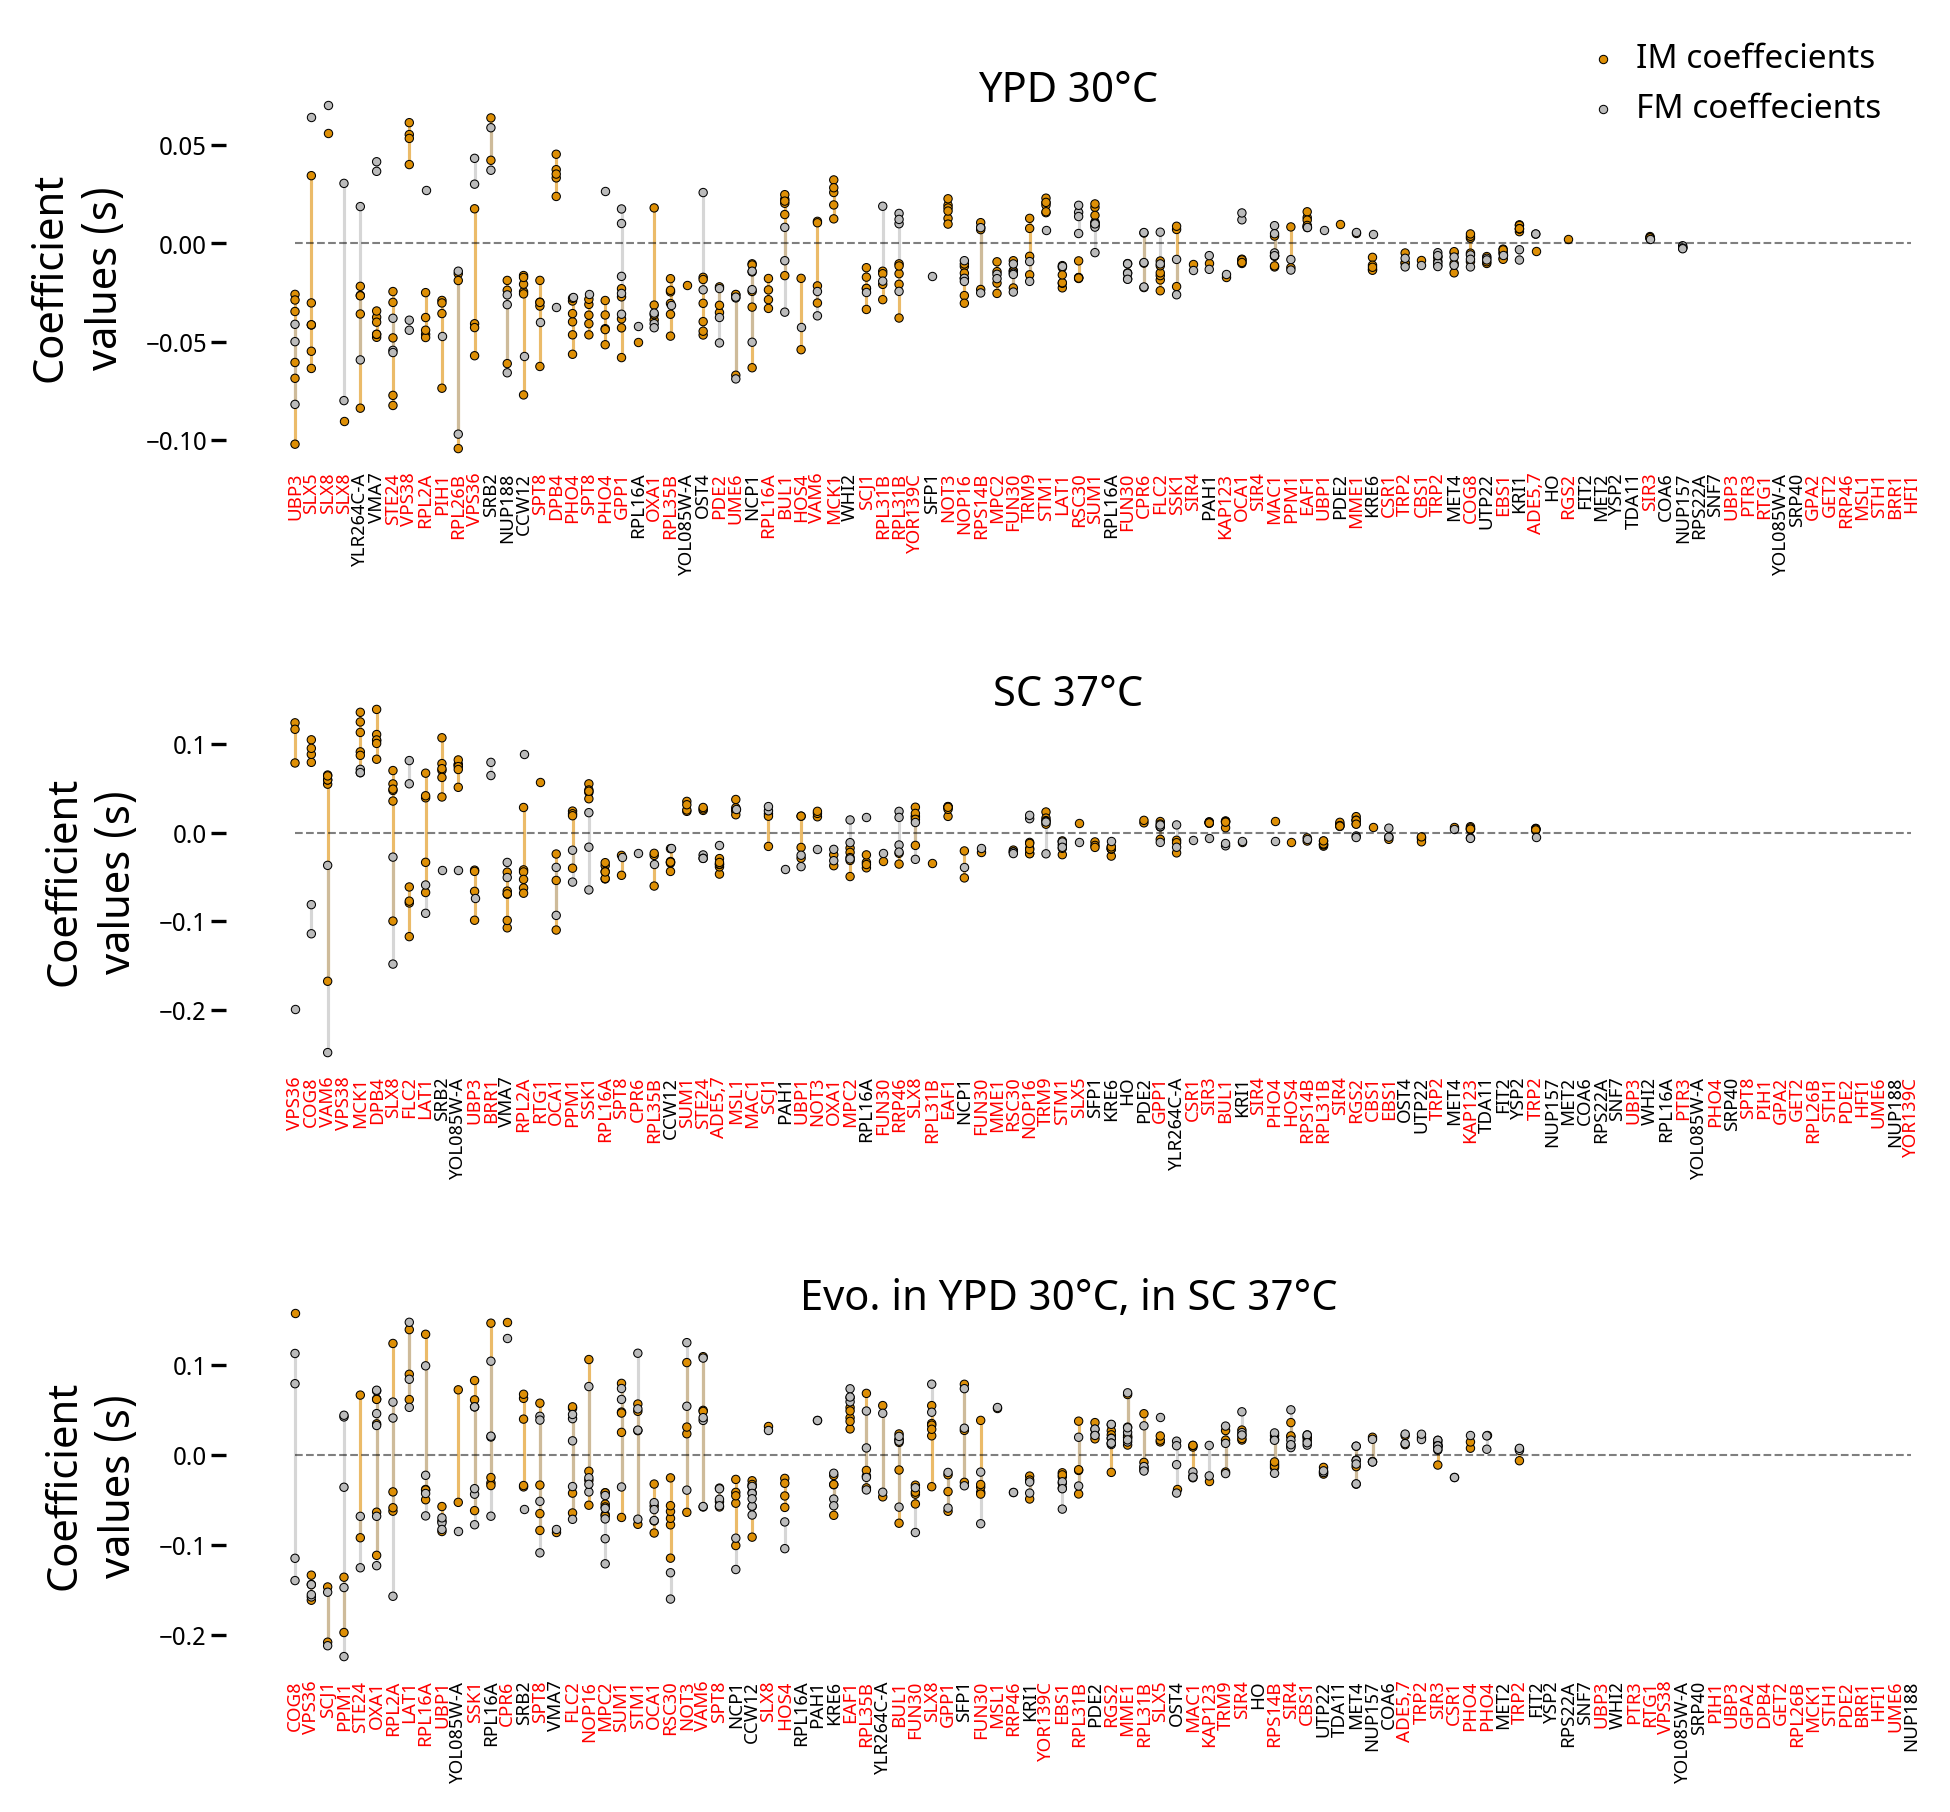

In [10]:
def plot_cs(coeffs, sub, edge_list):
    i = 0
    for edge in edge_list:
        if edge in coeffs['IM']:
            if len(coeffs['IM'][edge])>0:
                sub.plot([i]*2, [np.min(coeffs['IM'][edge]), np.max(coeffs['IM'][edge])], c=colors[1], lw=0.75, alpha=0.6, zorder=0)
                sub.scatter([i]*len(coeffs['IM'][edge]), coeffs['IM'][edge], c=[colors[1]]*len(coeffs['IM'][edge]), s=4, edgecolors= "black", linewidths=0.25, zorder=1)
        if edge in coeffs['FM']:
            if len(coeffs['FM'][edge])>0:
                sub.plot([i]*2, [np.min(coeffs['FM'][edge]), np.max(coeffs['FM'][edge])], c='#BBBBBB', lw=0.75, alpha=0.6, zorder=0)
                sub.scatter([i]*len(coeffs['FM'][edge]), coeffs['FM'][edge], c=['#BBBBBB']*len(coeffs['FM'][edge]), s=4, edgecolors= "black", linewidths=0.25, zorder=1)
                
        i += 1


def plot_w_coeffs(cond, sub, edge_list=None):
    if not edge_list:
        edge_list = list(vtn_modeling.sort_values(by=cond+'_s_var', ascending=False)['Edge'])
    plot_cs(coeffs_by_cond[cond][0], sub, edge_list)
    sub.set_xlim(subs[0].get_xlim())
    sub.plot([0, len(edge_list)], [0,0], linestyle='dashed', c='k', lw=0.5, alpha=0.5)
    sub.tick_params(axis='y', which='major', labelsize=6, pad=1)
    sub.tick_params(axis='x', which='major', labelsize=4.5, pad=-2)
    sub.set_ylabel('Coefficient\nvalues (s)')
    gene_ticks(edge_list, sub, fs=4.5)
    sub.tick_params(axis="x", bottom=False)
    

fig, subs = pl.subplots(3, 1, figsize=(7.25, 7), dpi=300) 
pl.subplots_adjust(hspace=0.6)
plot_w_coeffs('P1_YPD_30C', subs[0])
plot_w_coeffs('P3_SC_37C', subs[1])
plot_w_coeffs('P1_SC_37C', subs[2])
sns.despine(bottom=True, left=True)
subs[0].set_title('YPD 30°C', fontsize=10, y=0.9)
subs[1].set_title('SC 37°C', fontsize=10, y=0.9)
subs[2].set_title('Evo. in YPD 30°C, in SC 37°C', fontsize=10, y=0.9)
subs[0].scatter([], [], c=colors[1], s=4, edgecolors= "black", linewidths=0.25, label='IM coeffecients')
subs[0].scatter([], [], c='#BBBBBB', s=4, edgecolors= "black", linewidths=0.25, label='FM coeffecients')
subs[0].legend(bbox_to_anchor=(0.7, 1, 0.3, 0.2), frameon=False, fontsize=8, handletextpad=0)
fig.savefig('../../Figures/supp_figs/coeffs_by_mutation.pdf', background='transparent', bbox_inches='tight', pad_inches=0.1)


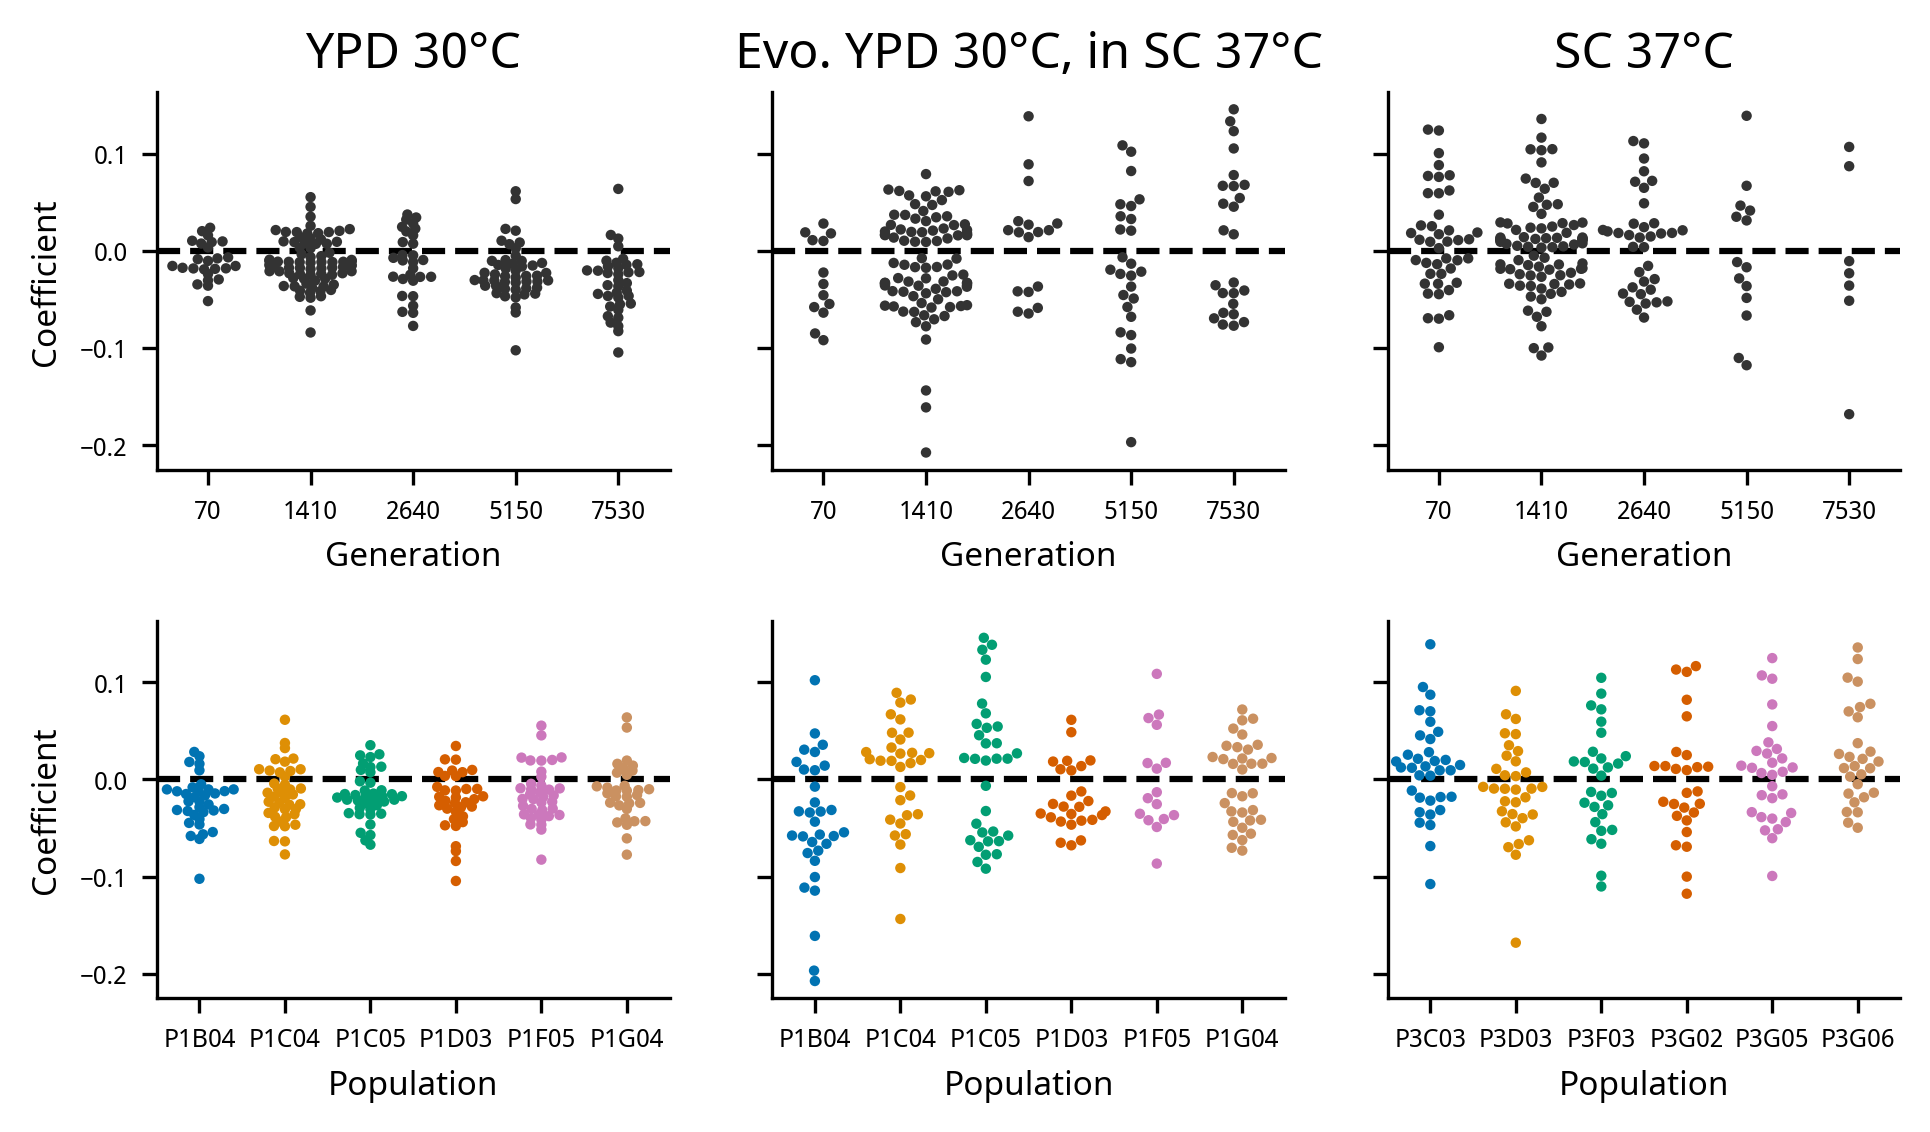

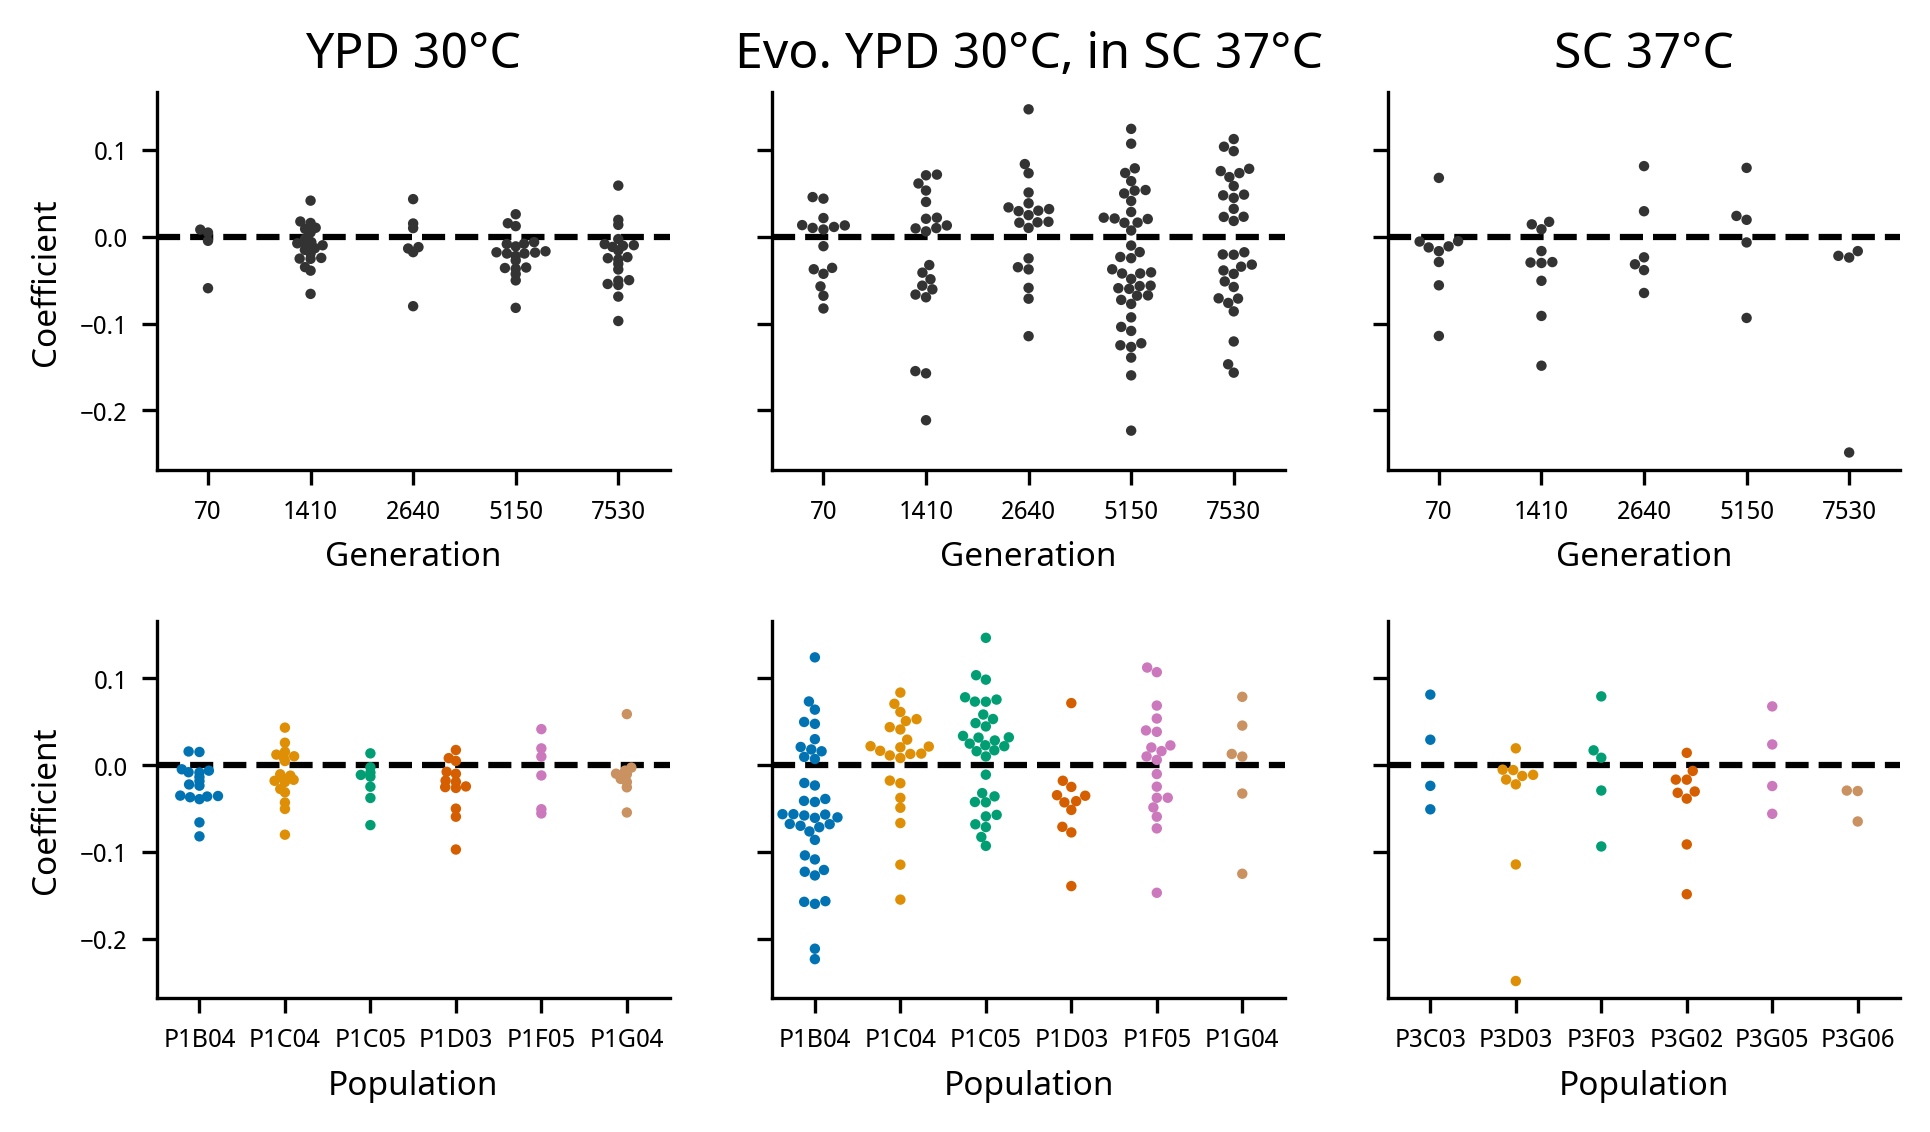

In [11]:
def coeff_breakdown(edge_stats, cond, subs, model):
    mat = []
    for i in np.array(edge_stats[(edge_stats['Type']=='Experiment') & (pd.notnull(edge_stats[cond+'_'+model+'_Params']))][[cond+'_'+model+'_Params', cond+'_'+model+'_Coeffs']]):
        if model == 'IM':
            p, c = i[0].split(';'), i[1].split(';')
        elif model == 'FM':
            fps = str(i[0]).split(';')
            FM_cs = str(i[1]).split(';')
            c = [float(FM_cs[i]) for i in range(len(FM_cs)) if fps[i]!='Fitness_sub_70']
            p = [fps[i] for i in range(len(FM_cs)) if fps[i]!='Fitness_sub_70']
        for j in range(1, len(p)):
            mat.append([p[j], float(c[j])])

    all_coeffs = pd.DataFrame(mat, columns=['Param', 'Coeff'])
    all_coeffs['Pop'] = all_coeffs['Param'].str.split('_').str[1]
    all_coeffs['Gen'] = all_coeffs['Param'].apply(lambda p: int(str(p).split('_')[2]))
    sns.swarmplot(data=all_coeffs, x='Pop', y='Coeff', hue='Pop', palette=color_map, order=cond_pops[cond.split('_')[0]], ax=subs[1], s=2.5)
    sns.swarmplot(data=all_coeffs, x='Gen', y='Coeff', color='#333333', ax=subs[0], s=2.5)
    subs[1].get_legend().remove()
    
def coeff_breakdown_plot(edge_stats, model, outname):
    fig, subps = pl.subplots(2, 3, figsize=(7.5, 4), dpi=300, sharey=True)
    pl.subplots_adjust(hspace=0.4)
    coeff_dfs = dict()
    cond_plus = ['P1_YPD_30C', 'P1_SC_37C', 'P3_SC_37C']
    for i in range(3):
        subs = [subps[0][i], subps[1][i]]
        for j in range(2):
            subs[j].axhline(y=0, c='k', linestyle='dashed')
            subs[j].tick_params(labelsize=6)

        coeff_breakdown(edge_stats, cond_plus[i], subs, model)
        subs[0].set_title(cond_to_title[cond_plus[i]])
        subs[0].set_xlabel('Generation', fontsize=8)
        subs[1].set_xlabel('Population', fontsize=8)
        if i == 0:
            subs[0].set_ylabel('Coefficient', fontsize=8)
            subs[1].set_ylabel('Coefficient', fontsize=8)
        else:
            subs[0].set_ylabel('')
            subs[1].set_ylabel('')

    sns.despine()
    fig.savefig(outname, background='transparent', bbox_inches='tight', pad_inches=0.1)

coeff_breakdown_plot(vtn_modeling, 'IM', '../../Figures/supp_figs/Coeff_breakdown_IM.pdf')
coeff_breakdown_plot(vtn_modeling, 'FM', '../../Figures/supp_figs/Coeff_breakdown_FM.pdf')

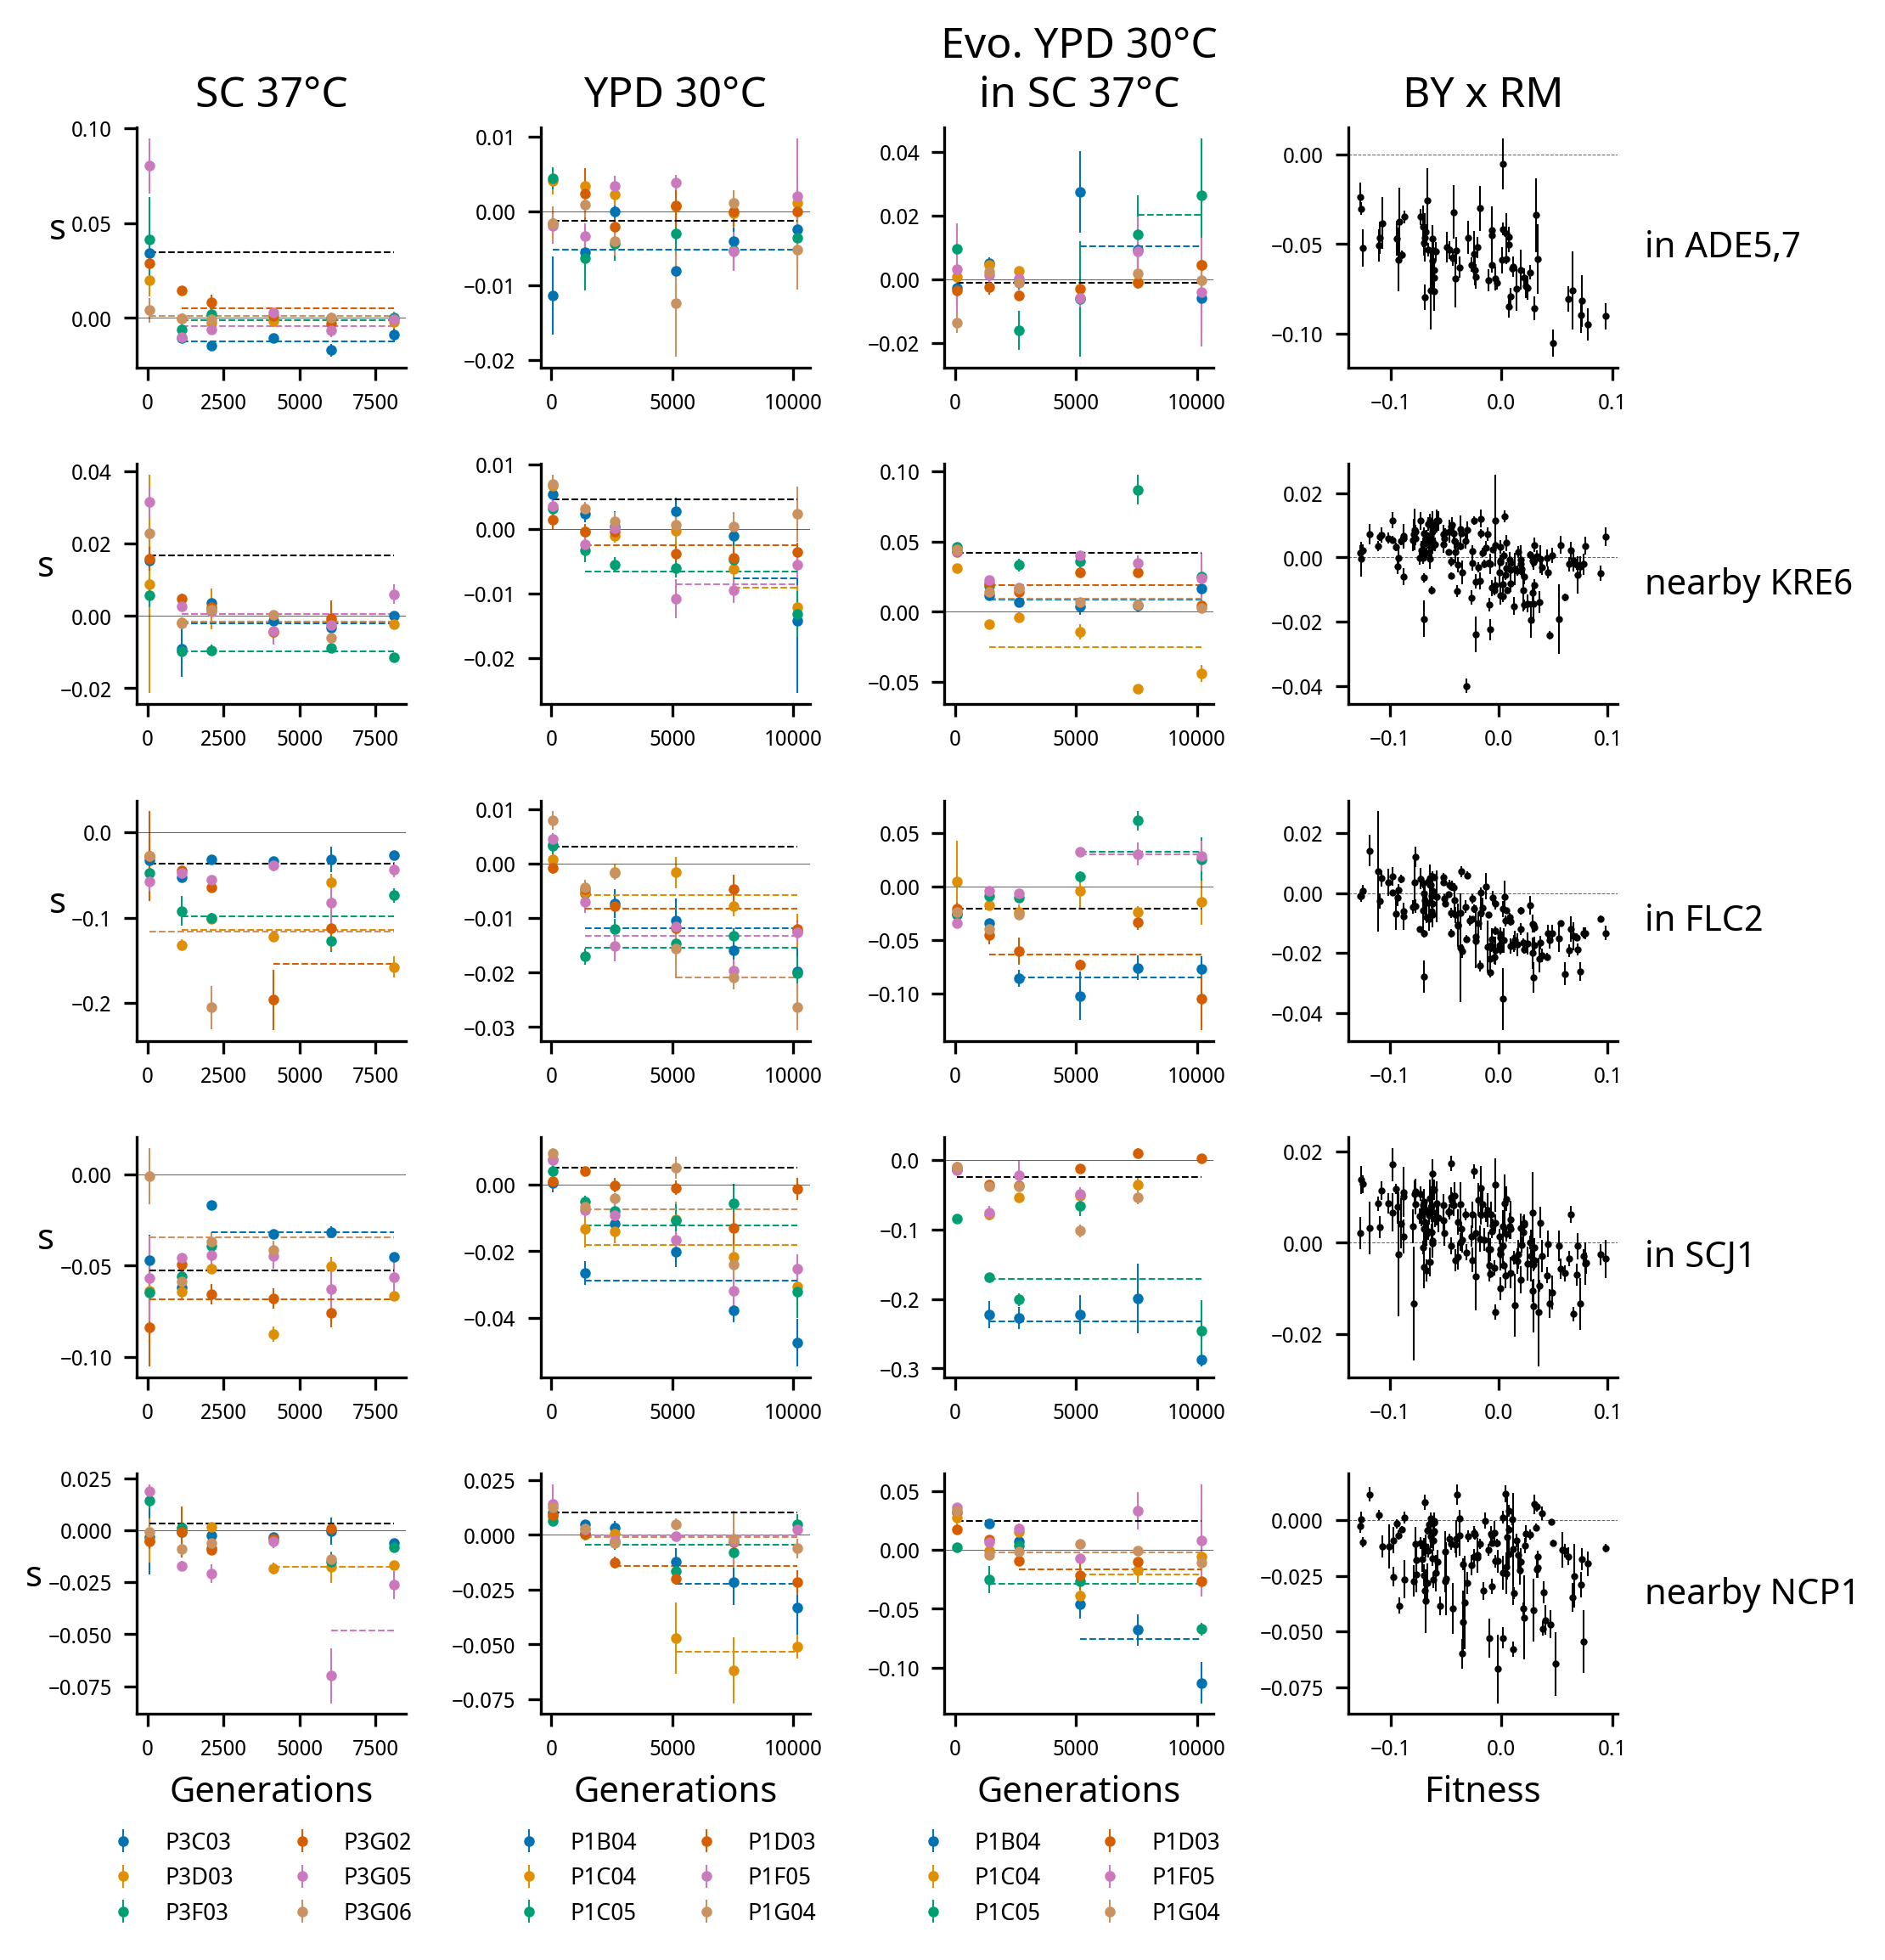

In [12]:
def plot_one_det(edge_stats, sub, cond, edge, model, axis_color, title_cond=True, ms=2, xlabel=True, title_at_all=True):
    td = vtn_s[(vtn_s['Edge']==edge) & (vtn_s['Cond']==cond) & (vtn_s['num_cbcs']>=5)]
    sub.axhline(0, color='k', linewidth=0.25, alpha=0.6)
    xvar = {'FM': 'Fitness', 'IM': 'Gen', 'IM2': 'Gen'}[model]
    for pop in cond_pops[cond.split('_')[0]]:
        ttd = td[td.Pop==pop].sort_values('Gen')
        if xvar == 'Gen':
            gen_rec = [gen_fixer[g][cond.split('_')[0]] for g in ttd['Gen']]
            sub.errorbar(x=gen_rec, y=ttd['s'], yerr=ttd['stderr'], linestyle='', marker='.', markersize=ms, linewidth=0.5, color=color_map[pop], label=pop)
        else:
            sub.errorbar(x=ttd[xvar], y=ttd['s'], xerr=ttd['Fitness_std'], yerr=ttd['stderr'], linestyle='', marker='.', markersize=ms, linewidth=0.5, color=color_map[pop], label=pop)
    if xlabel: 
        sub.set_xlabel({'Gen': 'Generations', 'Fitness': 'Fitness'}[xvar], fontsize=7)
    gene = e2g[edge]
    if title_cond:
        sub.set_title(cond_to_title[cond] + '\n' + gene, fontsize=7, y=0.95)
    elif title_at_all:
        sub.set_title(gene, fontsize=7, y=0.95)
    
    #sub.set_ylim([-0.15, 0.1])
    sub.tick_params(which='both', labelsize=6, colors=axis_color)
    sub.spines['bottom'].set_color(axis_color)
    sub.spines['left'].set_color(axis_color)
    #fit lines
    fit = edge_stats[edge_stats.Edge==edge].iloc[0]
    if pd.notnull(fit[cond+'_'+model+'_Params']):
        params = fit[cond+'_'+model+'_Params'].split(';')
        cs = fit[cond+'_'+model+'_Coeffs'].split(';')
        coeffs = {params[i]: float(cs[i]) for i in range(len(params))}
        if model == 'IM': 
            coeffs['Fitness_sub_70'] = 0
            coeffs['Intercept'] = td['g70_s'].iloc[0]
        elif model == 'FM':
            coeffs['Intercept'] = td['g70_s'].iloc[0]-g70_fits[cond]*coeffs['Fitness_sub_70']
        if xvar == 'Gen':
            x_rec = [gen_fixer[g][cond.split('_')[0]] for g in td['Gen']]
        else:
            x_rec = td[xvar]
        xlims = [np.min(x_rec), np.max(x_rec)]
        sub.plot(xlims, [i*coeffs['Fitness_sub_70']+coeffs['Intercept'] for i in xlims], c='k', linestyle='dashed', lw=0.5)
        for coef in [c for c in coeffs if c not in ['Fitness_sub_70', 'Intercept', 'dummy']]:
            if xvar == 'Gen':
                xlims[0] = np.min([gen_fixer[g][cond.split('_')[0]] for g in td[(td['Pop']==coef.split('_')[1]) & (td['Gen']>=int(coef.split('_')[-1]))][xvar]])
            else:
                xlims[0] = np.min(td[(td['Pop']==coef.split('_')[1]) & (td['Gen']>=int(coef.split('_')[-1]))][xvar])
            sub.plot(xlims, [i*coeffs['Fitness_sub_70']+coeffs['Intercept']+coeffs[coef] for i in xlims], c=color_map[coef.split('_')[1]], linestyle='dashed', lw=0.5)

            
def plot_one_byrm(sub, edge, axis_color):
    ttd = byrm_s[(byrm_s['Edge']==edge) & (byrm_s['num_cbcs']>=5)]
    sub.axhline(0, linestyle='dashed', color='k', linewidth=0.25, alpha=0.6)
    sub.errorbar(x=ttd['Fitness'], y=ttd['s'], yerr=ttd['stderr'], linestyle='', marker='.', markersize=2, linewidth=0.5, color='k')
    sub.tick_params(which='both', labelsize=6, colors=axis_color)
    sub.spines['bottom'].set_color(axis_color)
    sub.spines['left'].set_color(axis_color)
    

def plot_6(edge_stats, edges, outname, model, sharey='row'):
    fig, subps = pl.subplots(6, 4, figsize=(7.5, 10), dpi=300, sharey=sharey)
    if sharey == 'row':
        pl.subplots_adjust(hspace=0.4)
    else:
        pl.subplots_adjust(hspace=0.4, wspace=0.5)
    rc = 0
    subps[0][-1].set_title('BY x RM')
    subps[len(edges)-1][-1].set_xlabel('Fitness', fontsize=10)
    for rc in range(6):
        if rc < len(edges):
            edge = edges[rc]
            subs = subps[rc]
            subs[-1].annotate(e2g[edge], xy=(1.1, 0.5), xycoords='axes fraction', ha='left', va='center')
            subs[0].set_ylabel('s', rotation='horizontal', fontsize=10)
            plot_one_byrm(subs[-1], edge, 'k')
            for i in range(3):
                plot_one_det(edge_stats, subs[i], conds_alt_order[i], edge, model, 'k', ms=4, title_cond=False, xlabel=False, title_at_all=False)
                if rc == 0:
                    subs[i].set_title(cond_to_title[conds_alt_order[i]].replace(', ', '\n'))
                elif rc == len(edges)-1:
                    subs[i].set_xlabel('Generations', fontsize=10)
                    subs[i].legend(frameon=False, bbox_to_anchor=(1.1,-0.4), fontsize=6.5, ncol=2)
        else:
            for i in range(4):
                subps[rc][i].remove()
                
    sns.despine()
    fig.savefig(outname, background='transparent', bbox_inches='tight', pad_inches=0.1)

conds_alt_order = ['P3_SC_37C', 'P1_YPD_30C', 'P1_SC_37C']
plot_6(vtn_modeling, ['AGATTCATCCCATGG', 'AAAAGAAAAATGTAT', 'TGATCATCACGGGAC', 'TCGATAGAATTTACT', 'TAACCTCGCGCTGAG'], '../../Figures/supp_figs/Diminishing_returns.pdf', 'IM', sharey=False)

In [15]:
edge_list = list(vtn_modeling[vtn_modeling.Type=='Experiment'].sort_values('Gene_Use')['Edge'])
for i in range(len(edge_list)//6+1):
    plot_6(vtn_modeling, edge_list[i*6:(i+1)*6], '../../Figures/supp_figs/determinants/F3S'+str(6+i).zfill(2) + '.pdf', 'IM')
    #plot_6(vtn_modeling, edge_list[i*6:(i+1)*6], '../../Figures/supp_figs/determinants/IM_det_' + str(i+1).zfill(2) + '.pdf', 'IM', sharey=False)
    #plot_6(vtn_modeling, edge_list[i*6:(i+1)*6], '../../Figures/supp_figs/determinants/FM_det_' + str(i+1).zfill(2) + '.pdf', 'FM', sharey=False)
    plot_6(vtn_modeling, edge_list[i*6:(i+1)*6], '../../Figures/supp_figs/determinants/F3S'+str(22+i).zfill(2) + '.pdf', 'FM')
    pl.close('all')

In [13]:
edge_list = list(vtn_modeling[vtn_modeling.Type=='Experiment'].sort_values('Gene_Use')['Edge'])
len(edge_list)//6+1

16

In [17]:
vtn_x[['Sample', 'Gen_Pop', 'Gen', 'Pop', 'Cond', 'Env', 'Fitness', 'Fitness_std', 's_VLTE', 's_VLTE_scaled', 'Clone_A_s', 'Clone_A_s_stderr', 'Clone_B_s_stderr']]

,Sample,Fitness,Fitness_std,Freq_T0,s_VLTE,s_VLTE_scaled,Clone_A_s,Clone_A_s_stderr,Clone_A_Ref_Freq_T0,Clone_B_s,Clone_B_s_stderr,Clone_B_Ref_Freq_T0,Pop_Ref_Freq_T0,Pop_s,Gen,Pop,Env,Cond
0,G10150_P1B04-YPD_30C,0.021696,0.008507,0.311579,0.026455,0.019163,0.013190,0.006972,0.708608,0.030203,0.001468,0.668234,0.677246,0.009163,10150,P1B04,YPD_30C,P1_YPD_30C
1,G10150_P1C04-YPD_30C,0.034238,0.004011,0.582763,0.055203,0.047911,0.038249,0.002200,0.415646,0.030227,0.006576,0.418828,0.399160,0.027589,10150,P1C04,YPD_30C,P1_YPD_30C
2,G10150_P1C05-YPD_30C,0.049031,0.000545,0.572865,0.074538,0.067246,0.048486,0.005472,0.428247,0.049575,0.005637,0.426023,0.417819,0.048099,10150,P1C05,YPD_30C,P1_YPD_30C
3,G10150_P1D03-YPD_30C,0.009032,0.004568,0.528379,0.015437,0.008145,0.013600,0.001366,0.435992,0.004464,0.002776,0.507251,0.442637,0.013217,10150,P1D03,YPD_30C,P1_YPD_30C
4,G10150_P1F05-YPD_30C,0.037805,0.001688,0.611830,0.049020,0.041728,0.039492,0.003987,0.376834,0.036117,0.008602,0.399506,0.390726,0.034456,10150,P1F05,YPD_30C,P1_YPD_30C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,G7530_P1C04-SC_37C,-0.001453,0.005673,0.487759,NaN,NaN,0.004220,0.001881,0.514713,-0.007126,0.002480,0.509769,NaN,NaN,7530,P1C04,SC_37C,P1_SC_37C
104,G7530_P1C05-SC_37C,-0.445743,0.008983,0.571839,NaN,NaN,-0.454726,0.009629,0.424621,-0.436761,0.027798,0.431701,NaN,NaN,7530,P1C05,SC_37C,P1_SC_37C
105,G7530_P1D03-SC_37C,-0.026708,0.003717,0.518107,NaN,NaN,-0.022991,0.004855,0.465825,-0.030425,0.004362,0.497962,NaN,NaN,7530,P1D03,SC_37C,P1_SC_37C
106,G7530_P1F05-SC_37C,-0.154465,0.004391,0.374175,NaN,NaN,-0.158856,0.030693,0.633519,-0.150074,0.019267,0.618130,NaN,NaN,7530,P1F05,SC_37C,P1_SC_37C
